In [31]:
import numpy as np
import random
import pandas as pd
from pandas import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

import xgboost as xgb #決策樹
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color


import warnings
warnings.filterwarnings('ignore')

In [32]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df.info()
df.shape, df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


((150, 5),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'))

In [34]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
Species = df['species'].unique()
Species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<AxesSubplot:>

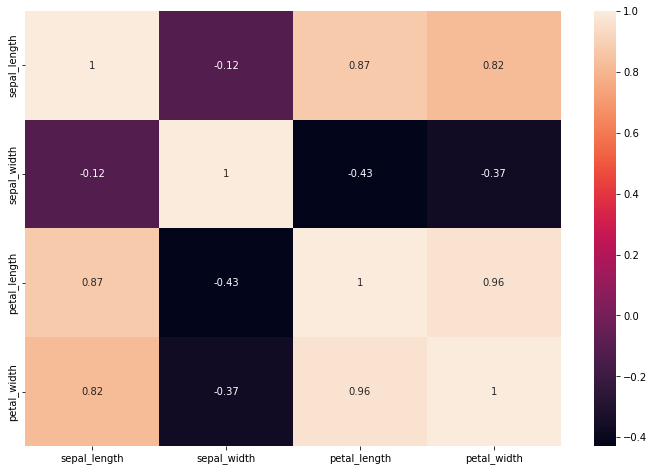

In [36]:
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species']].corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

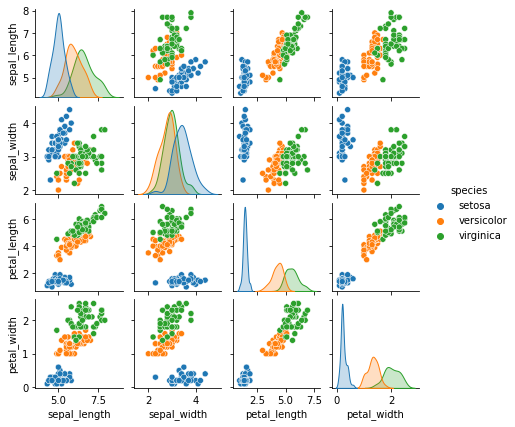

In [37]:
sns.pairplot(df,hue = 'species',size=1.5)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

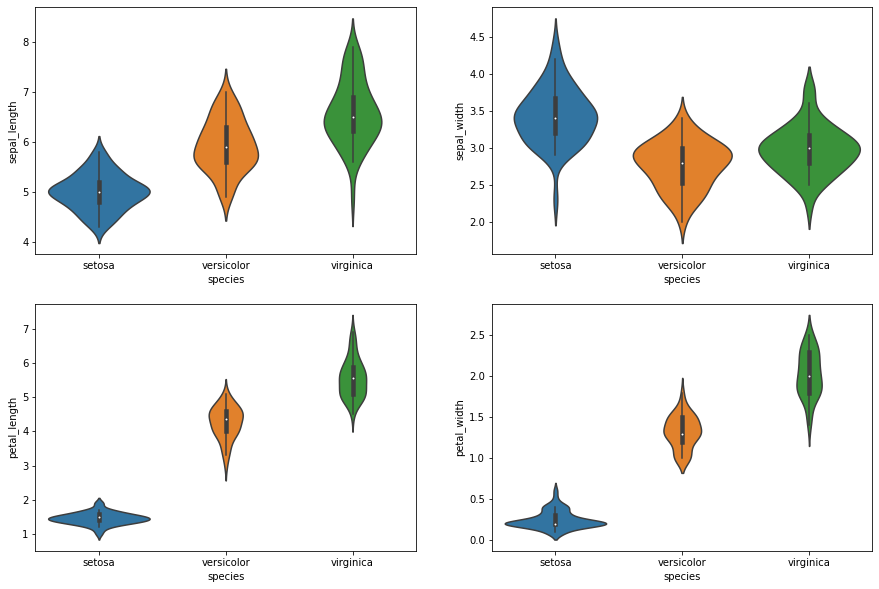

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)

In [39]:
X_iris = df.drop('species',axis = 1) #特徵矩陣
X_iris.shape

(150, 4)

In [62]:
y_iris = df['species'].values#目標矩陣
y_iris.shape
encoder = LabelEncoder()
y_iris = encoder.fit_transform(y_iris)
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest, = train_test_split(X_iris,y_iris,test_size = 0.3, random_state = 101)
Xtrain,Xtest,Ytrain,Ytest

'''X_train 與 y_train 是實際參與行訓練的資料。而 X_test 與 y_test
是未參與訓練的資料，它是被拿來測試評估最終訓練好的模型。'''

'X_train 與 y_train 是實際參與行訓練的資料。而 X_test 與 y_test\n是未參與訓練的資料，它是被拿來測試評估最終訓練好的模型。'

# logistic regression

In [65]:
lr_model = LogisticRegression()
lr_model.fit(Xtrain,Ytrain)
lr_predict = lr_model.predict(Xtest)

print('Logistic Regression - ',accuracy_score(lr_predict,Ytest))

Logistic Regression -  0.9777777777777777


# naive bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,Ytrain)
y_model = model.predict(Xtest)
y_model

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,y_model)

0.9555555555555556

# PCA

In [68]:
from sklearn.decomposition import PCA
model = PCA (n_components = 2) #主成分兩個
model.fit(X_iris)
X_2D = model.transform(X_iris)#將資料轉化為二維
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

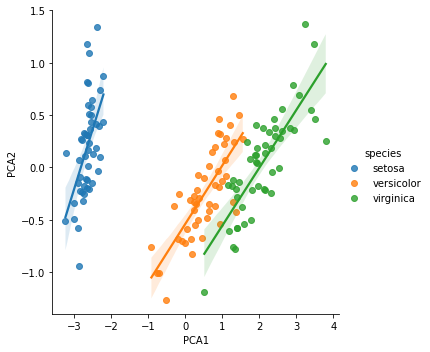

In [69]:
df["PCA1"] = X_2D[:,0]
df["PCA2"] = X_2D[:,1]
sns.lmplot("PCA1","PCA2",hue="species",data = df)#,fit_reg=False

In [70]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,1
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,1
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,1
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,1


# Gaussian mixture model

In [71]:
from sklearn.mixture import GaussianMixture as GMM
model = GMM(n_components = 3,covariance_type = 'full') #主成分三個
model.fit(X_iris)#訓練
y_gmm = model.predict(X_iris)#Y_GMM = 訓練後的數據集
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

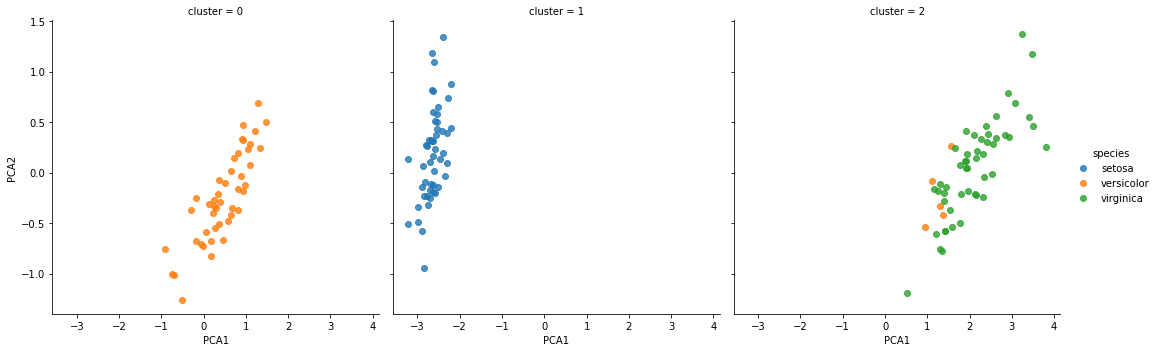

In [72]:
df['cluster'] = y_gmm
sns.lmplot("PCA1","PCA2", hue="species", col = 'cluster', data = df,fit_reg=False)

# SVM 

In [73]:
svm_model = SVC(kernel='linear')
svm_model.fit(Xtrain,Ytrain)
svc_predict = svm_model.predict(Xtest)

print('SVM - ',accuracy_score(svc_predict,Ytest))

cm = confusion_matrix(Ytest, svc_predict)
cm

SVM -  1.0


array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]], dtype=int64)

# Decision tree

In [74]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(Xtrain,Ytrain)
dt_predict = dt_model.predict(Xtest)

print('Decision Tree - ',accuracy_score(dt_predict,Ytest))

cm = confusion_matrix(Ytest,dt_predict)
cm

Decision Tree -  0.9333333333333333


array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  2, 10]], dtype=int64)

# Random forest 

In [75]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(Xtrain,Ytrain)
rfc_predict = rfc_model.predict(Xtest)


print('random forest ',accuracy_score(rfc_predict,Ytest))
cm = confusion_matrix(Ytest,rfc_predict)
cm

random forest  0.9555555555555556


array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

# Extra Tree Classifier

In [76]:
etc_model = ExtraTreesClassifier()
etc_model.fit(Xtrain,Ytrain)
etc_predict = etc_model.predict(Xtest)

print('Extra Tree Classifier - ',accuracy_score(etc_predict,Ytest))
cm = confusion_matrix(Ytest,etc_predict)
cm

Extra Tree Classifier -  0.9555555555555556


array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 11]], dtype=int64)

# KNN

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(Xtrain,Ytrain)
knn_predict = knn_model.predict(Xtest)

print('knn - ',accuracy_score(knn_predict,Ytest))

cm = confusion_matrix(Ytest, knn_predict)
cm

knn -  1.0


array([[13,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 12]], dtype=int64)

# XGBoost

In [80]:
xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(Xtrain,Ytrain)
xg_model.score(Xtest, Ytest)


0.9777777777777777